In [84]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv(r"Fertilizer_Prediction.csv")

In [92]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [94]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [96]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [98]:
# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None
       Temparature  Humidity    Moisture   Nitrogen  Potassium  Phosphorous
count    99.000000  99.000000  99.000000  99.000000  99.000000    99.000000
mean     30.282828  59.151515  43.181818  18.909091   3.383838    18.606061
std       3.502304   5.840331  11.271568  11.599693   5.814667    13.476978
min      25.000000  50.000000  25.000000   4

<Axes: xlabel='Fertilizer Name', ylabel='count'>

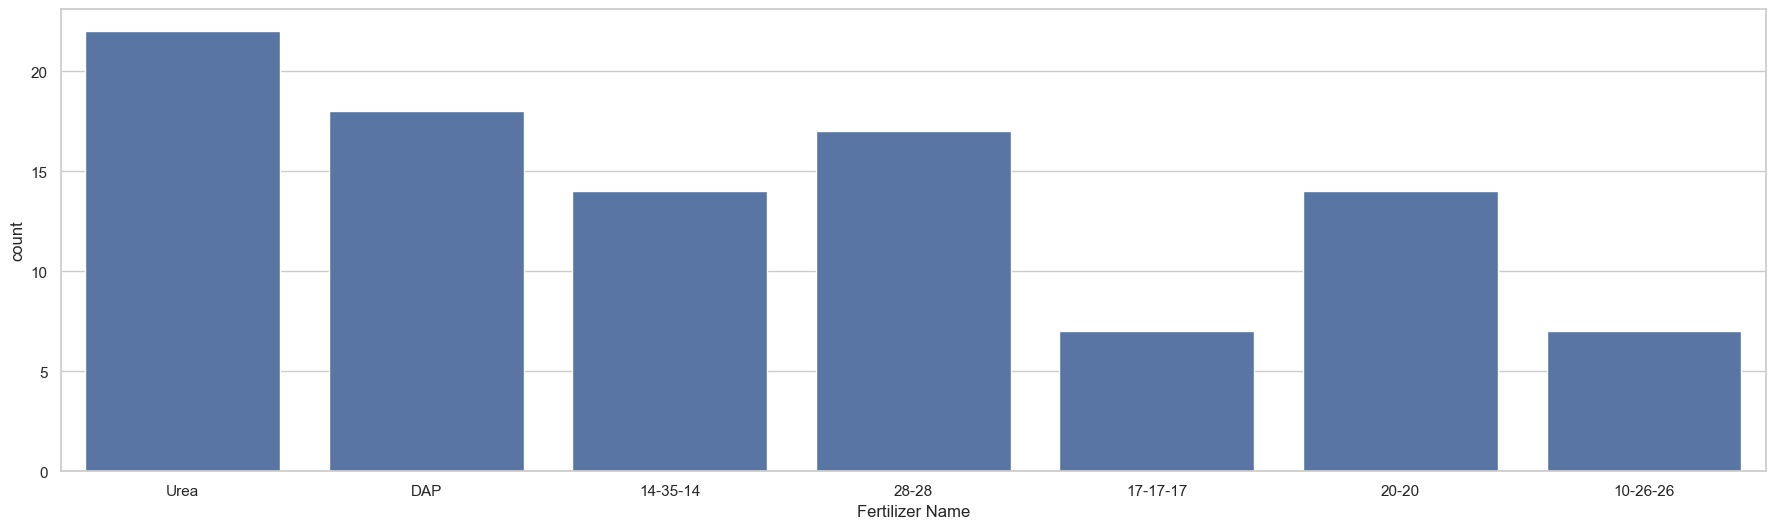

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,6))
sns.countplot(x='Fertilizer Name', data = df)

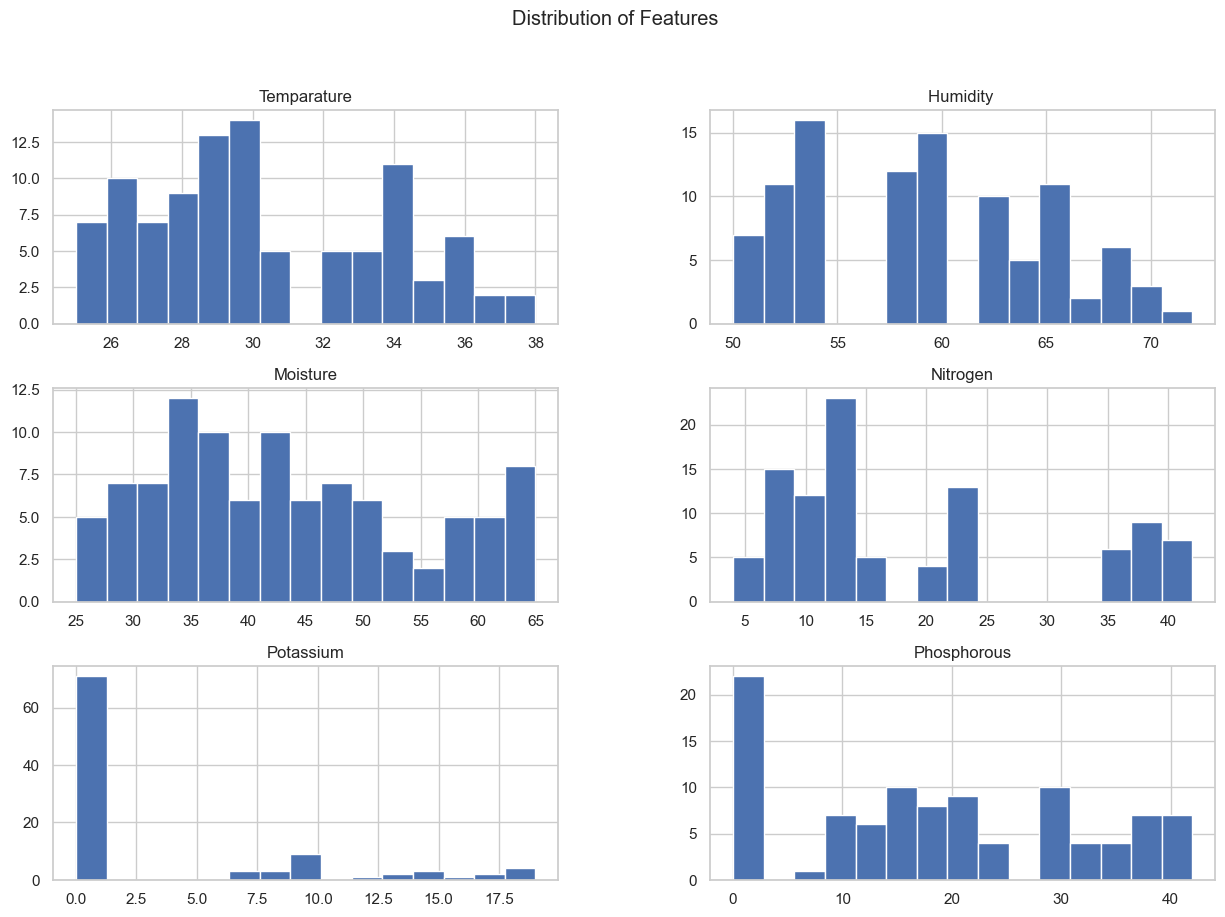

In [102]:
# Setting aesthetics for better readability of plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]

# Plotting histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.show()


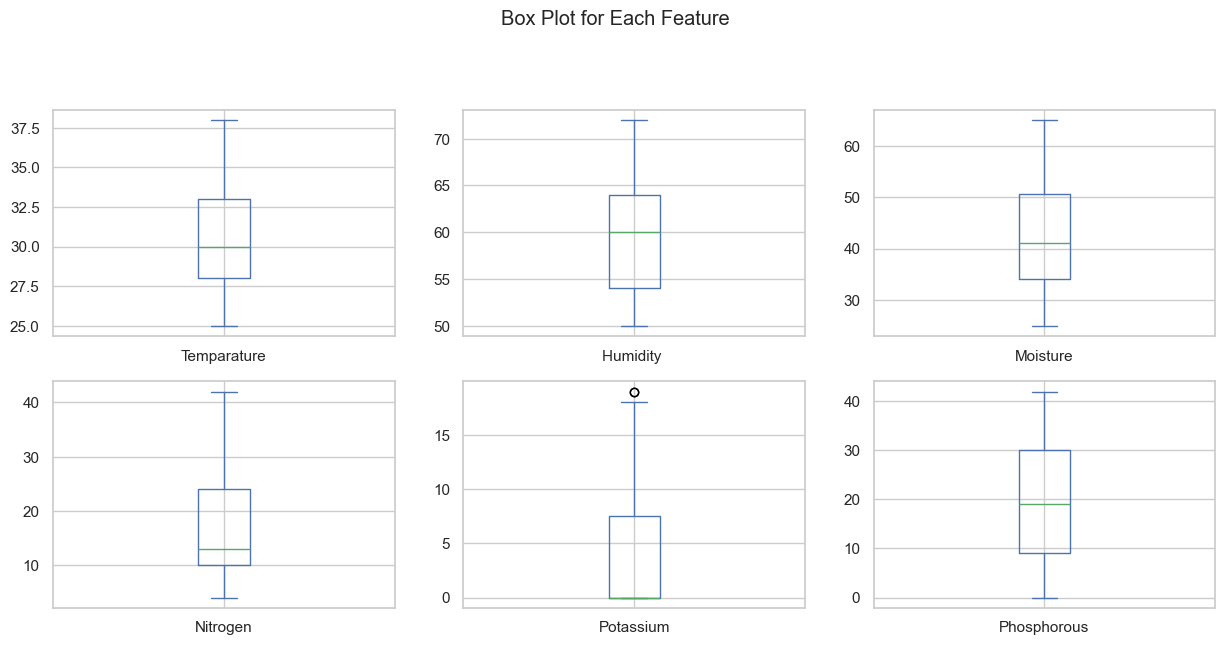

In [104]:
# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box Plot for Each Feature')
plt.show()


In [108]:
# Drop non-numeric columns before correlation
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
print(corr)


             Temparature  Humidity   Moisture  Nitrogen  Potassium  \
Temparature     1.000000   0.973164  0.091222 -0.033771  -0.023424   
Humidity        0.973164   1.000000  0.091342 -0.060646  -0.003833   
Moisture        0.091222   0.091342  1.000000 -0.095945   0.027727   
Nitrogen       -0.033771  -0.060646 -0.095945  1.000000  -0.500087   
Potassium      -0.023424  -0.003833  0.027727 -0.500087   1.000000   
Phosphorous     0.207545   0.204044  0.009276 -0.686971   0.089192   

             Phosphorous  
Temparature     0.207545  
Humidity        0.204044  
Moisture        0.009276  
Nitrogen       -0.686971  
Potassium       0.089192  
Phosphorous     1.000000  


<Axes: >

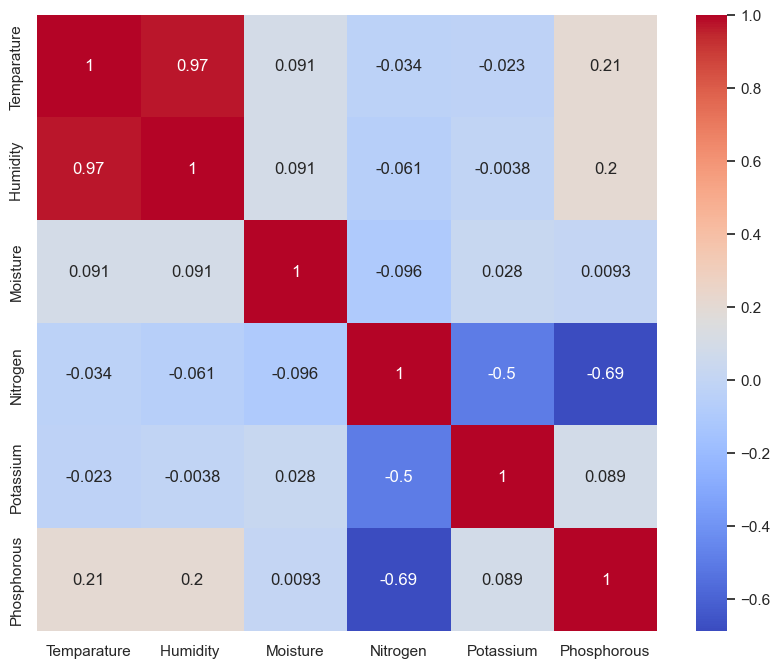

In [110]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

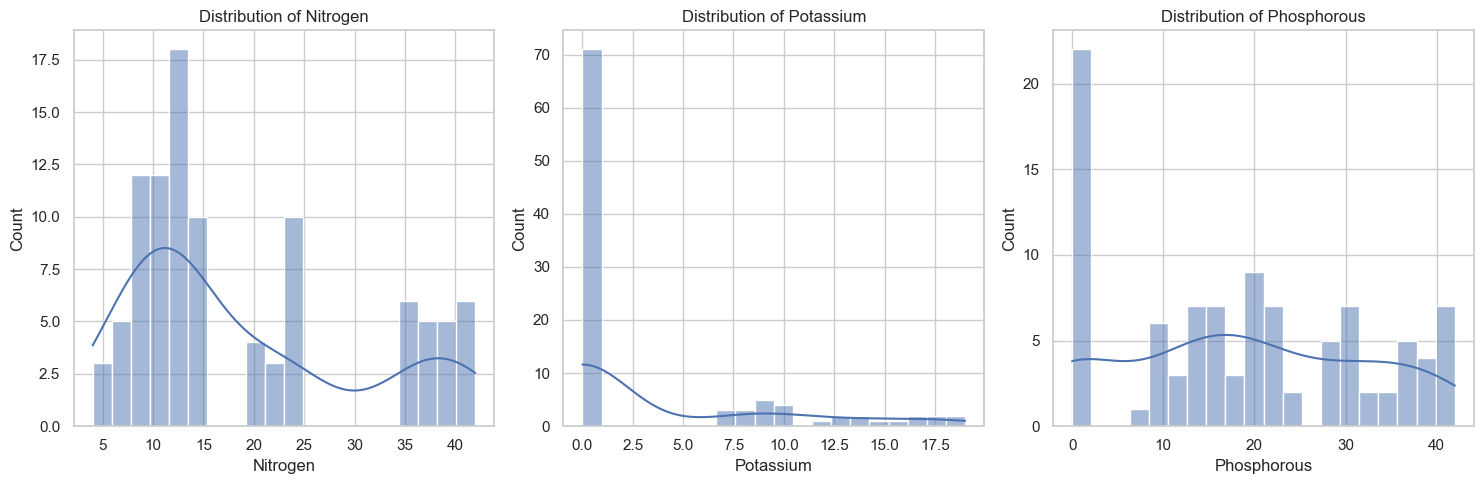

In [112]:
# Plotting the distribution graphs of the variables
plt.figure(figsize=(15, 5))

# Enumerating through each numeric column for distribution plot
for i, column in enumerate(['Nitrogen', 'Potassium', 'Phosphorous'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Removing the non-numeric column for correlation analysis
numeric_data = df.drop('Fertilizer Name', axis=1)

In [116]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [124]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le  # Store the encoder for future use

# Now apply StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [126]:
X_train[0]

array([-1.50323411, -1.54242294, -1.00710689, -0.69385953,  0.50983875,
        0.46072126, -0.57643157,  0.09092764])

In [130]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [132]:
y_pred = classifier.predict(X_test)

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 7]]


0.9666666666666667

In [136]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [138]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer Name']),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [140]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  79 non-null     int64 
 1   Humidity     79 non-null     int64 
 2   Moisture     79 non-null     int64 
 3   Soil Type    79 non-null     object
 4   Crop Type    79 non-null     object
 5   Nitrogen     79 non-null     int64 
 6   Potassium    79 non-null     int64 
 7   Phosphorous  79 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 5.6+ KB


In [146]:
categorical_columns = x_train.select_dtypes(include=['object']).columns  # Find categorical columns

le = LabelEncoder()
for col in categorical_columns:
    x_train[col] = le.fit_transform(x_train[col])  # Apply label encoding to categorical features

# Encoding the target variable y_train if it's categorical
if y_train.dtype == 'object':  # Check if target is categorical
    y_train = le.fit_transform(y_train)  # Encode the target labels

# Now, train the Random Forest model
rand = RandomForestClassifier(random_state=42)
rand.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [162]:
categorical_columns = x_test.select_dtypes(include=['object']).columns  # Find categorical columns

le = LabelEncoder()

for col in categorical_columns:
    x_test[col] = le.fit_transform(x_test[col])  # Encode categorical columns in x_test

# Now make predictions
pred_rand = rand.predict(x_test)

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.60      1.00      0.75         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.85        20
   macro avg       0.75      0.86      0.79        20
weighted avg       0.76      0.85      0.79        20

Best score :  0.9748338081671415
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute evaluation metrics
accuracy_rand = accuracy_score(y_test, pred_rand)
precision_rand = precision_score(y_test, pred_rand, average='weighted')
recall_rand = recall_score(y_test, pred_rand, average='weighted')
f1_rand = f1_score(y_test, pred_rand, average='weighted')

# Print evaluation metrics
print(f"Random Forest Classifier Metrics with GridSearchCV:")
print(f"Accuracy: {accuracy_rand}")
print(f"Precision: {precision_rand}")
print(f"Recall: {recall_rand}")
print(f"F1-score: {f1_rand}")

# Compute the confusion matrix
conf_matrix_rand = confusion_matrix(y_test, pred_rand)

Random Forest Classifier Metrics with GridSearchCV:
Accuracy: 0.85
Precision: 0.7566666666666666
Recall: 0.85
F1-score: 0.7925


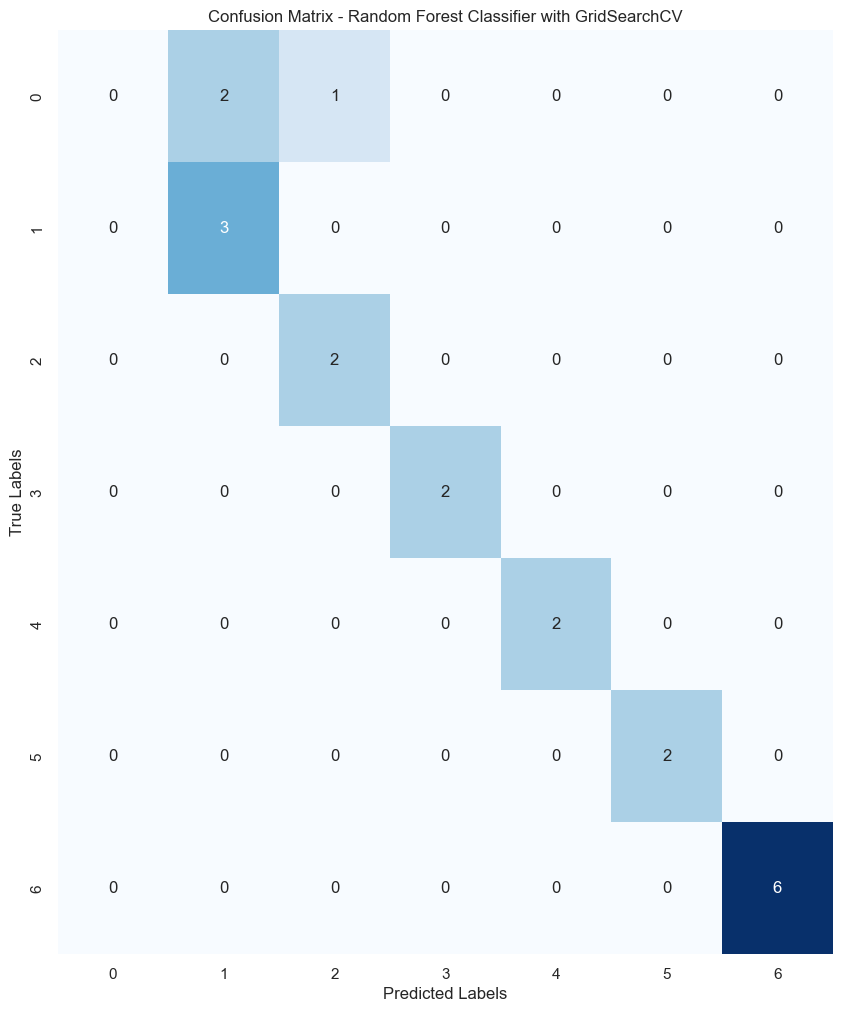

In [170]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix_rand, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier with GridSearchCV')
plt.show()

## Export model to Pickle file

In [176]:
import pickle
pickle_out = open('random_forest_model.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()